# 正余弦位置编码 Sinusoidal Position Encoding

$$ \text{PE}{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d{\text{model}}}}\right) $$

$$ \text{PE}{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d{\text{model}}}}\right) $$

pos表示 token 在序列中的位置，取值范围为[0, 1, 2, ..., seq_len-1]；i表示embedding的维度索引，范围为$[0, 1, ..., d_{model}/2 - 1]$，i的所有取值总共有$d_{model}/2$个，每一个都分别通过施加sin或cos变换来对应某个token的embedding不同位置的偶数维与奇数维

In [1]:
import numpy as np

def sinusoidal_position_encoding(seq_len, d_model):
    # 计算正余弦位置编码
    # seq_len: 序列长度
    # d_model: 模型维度
    # 返回一个形状为 (seq_len, d_model) 的位置编码矩阵
    
    # 创建位置编码矩阵
    position = np.arange(seq_len)[:, np.newaxis] # 增加一个维度 (seq_len, 1)
    div_term = np.power(10000, (2 *  (np.arange(d_model // 2)) / np.float32(d_model))) # 频率缩放因子

    # 计算正余弦位置编码
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position / div_term)
    pe[:, 1::2] = np.cos(position / div_term)

    return pe

# 示例：seq_len = 120, d_model = 8
seq_len = 120
d_model = 8
pe = sinusoidal_position_encoding(seq_len, d_model)

print(pe.shape)

(120, 8)


# 正余弦位置编码会导致token在低维元素之间变化快，但高维则变化慢

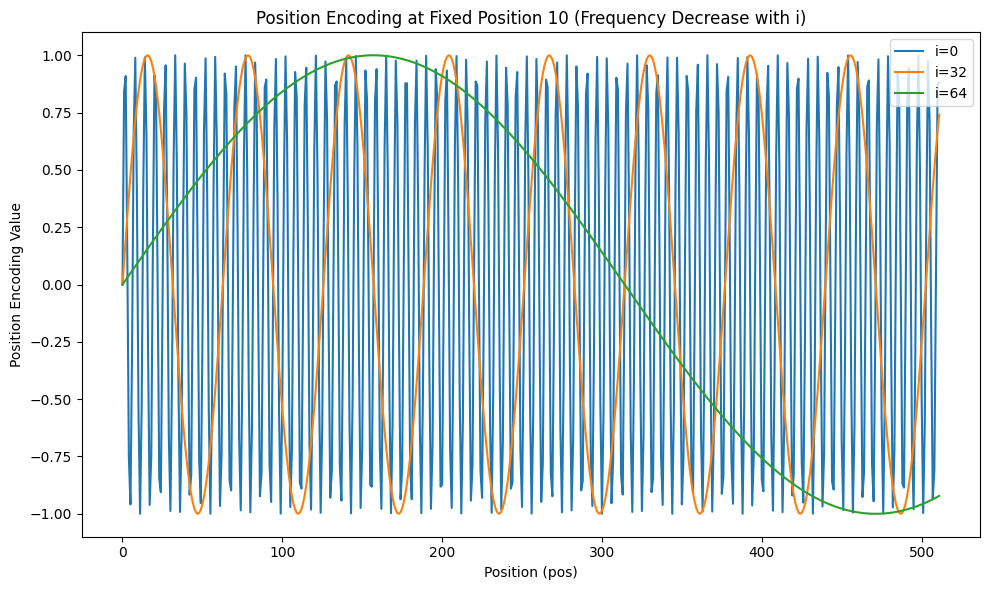

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoidal_position_encoding(seq_len, d_model):
    # seq_len: 序列长度
    # d_model: 模型维度
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.power(10000, (2 * (np.arange(d_model // 2) / np.float32(d_model))))

    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position / div_term)
    pe[:, 1::2] = np.cos(position / div_term)

    return pe

seq_len = 512 # 序列长度
d_model = 128 # 模型维度

# 获取位置编码
pe = sinusoidal_position_encoding(seq_len, d_model)

plt.figure(figsize=(10, 6))
fixed_pos = 10 # 固定位置
for i in [0, 32, 64]:
    plt.plot(np.arange(seq_len), pe[:, i], label=f'i={i}')
plt.xlabel("Position (pos)")
plt.ylabel("Position Encoding Value")
plt.title(f"Position Encoding at Fixed Position {fixed_pos} (Frequency Decrease with i)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()